Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Bulan      12 non-null     object
 1   Penjualan  12 non-null     int64 
 2   Harga      12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 420.0+ bytes
None

Beberapa baris pertama dari data:
      Bulan  Penjualan  Harga
0   Januari        100    200
1  Februari        150    210
2     Maret        120    215
3     April        130    220
4       Mei        140    225

Deskripsi statistik:
         Penjualan       Harga
count    12.000000   12.000000
mean    495.000000  235.000000
std    1105.264263   21.742292
min     100.000000  200.000000
25%     137.500000  218.750000
50%     170.000000  235.000000
75%     220.000000  251.250000
max    4000.000000  270.000000


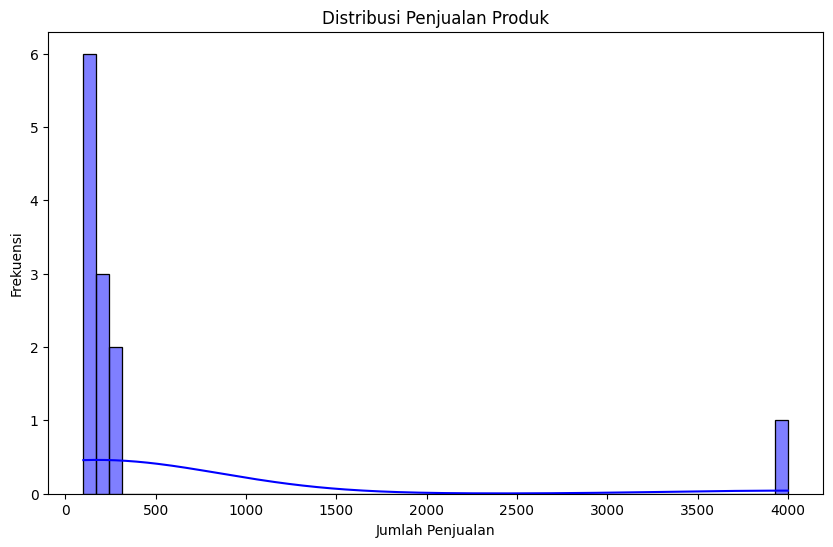

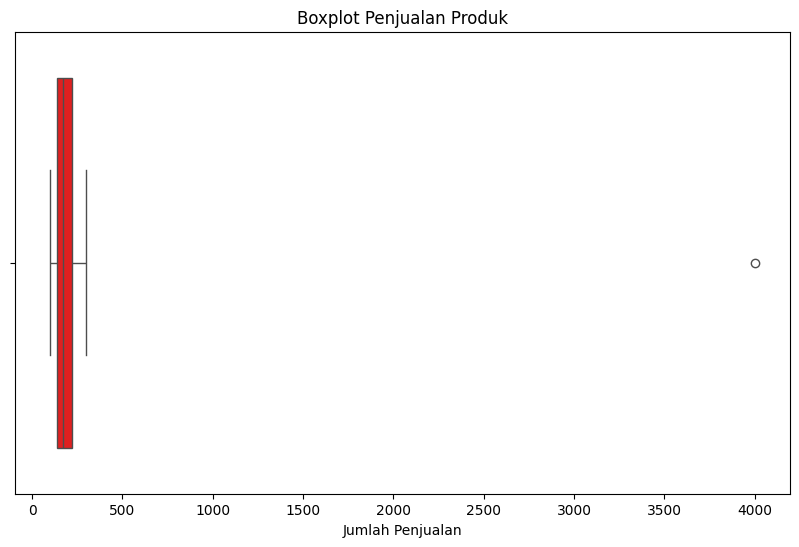


Data Outlier berdasarkan IQR:
       Bulan  Penjualan  Harga
10  November       4000    260

Data Setelah Dibersihkan (Outlier Dihapus):
        Bulan  Penjualan  Harga
0     Januari        100    200
1    Februari        150    210
2       Maret        120    215
3       April        130    220
4         Mei        140    225
5        Juni        160    230
6        Juli        180    240
7     Agustus        210    250
8   September        200    245
9     Oktober        250    255
11   Desember        300    270

Data Setelah Outlier Diganti dengan Median:
        Bulan  Penjualan  Harga
0     Januari      100.0    200
1    Februari      150.0    210
2       Maret      120.0    215
3       April      130.0    220
4         Mei      140.0    225
5        Juni      160.0    230
6        Juli      180.0    240
7     Agustus      210.0    250
8   September      200.0    245
9     Oktober      250.0    255
10   November      170.0    260
11   Desember      300.0    270


In [1]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bab 1: Pengenalan Data

# Membuat dataset fiktif
data = {
    'Bulan': ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'],
    'Penjualan': [100, 150, 120, 130, 140, 160, 180, 210, 200, 250, 4000, 300],  # Perhatikan adanya outlier (4000)
    'Harga': [200, 210, 215, 220, 225, 230, 240, 250, 245, 255, 260, 270]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Menampilkan informasi dasar tentang dataset
print("Informasi dataset:")
print(df.info())

# Menampilkan beberapa baris pertama
print("\nBeberapa baris pertama dari data:")
print(df.head())

# Menampilkan deskripsi statistik data
print("\nDeskripsi statistik:")
print(df.describe())

# Bab 2: Visualisasi

# Visualisasi distribusi data penjualan menggunakan histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Penjualan'], kde=True, color='blue')
plt.title('Distribusi Penjualan Produk')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk mendeteksi outlier pada data penjualan
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Penjualan'], color='red')
plt.title('Boxplot Penjualan Produk')
plt.xlabel('Jumlah Penjualan')
plt.show()

# Bab 3: Deteksi Outlier Menggunakan IQR

# Menghitung Q1 (25th percentile) dan Q3 (75th percentile)
Q1 = df['Penjualan'].quantile(0.25)
Q3 = df['Penjualan'].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan data outlier
outliers = df[(df['Penjualan'] < lower_bound) | (df['Penjualan'] > upper_bound)]
print("\nData Outlier berdasarkan IQR:")
print(outliers)

# Bab 4: Membersihkan Data

# Menghapus data outlier
df_cleaned = df[(df['Penjualan'] >= lower_bound) & (df['Penjualan'] <= upper_bound)]

# Menampilkan data setelah dibersihkan
print("\nData Setelah Dibersihkan (Outlier Dihapus):")
print(df_cleaned)

# Atau mengganti outlier dengan nilai yang lebih wajar, misalnya dengan median
median_value = df['Penjualan'].median()
df['Penjualan'] = df['Penjualan'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

# Menampilkan data setelah outlier diganti dengan median
print("\nData Setelah Outlier Diganti dengan Median:")
print(df)
